In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
train = pd.read_csv("loan_train_data.csv")
train.head()
test = pd.read_csv("loan_data.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [21]:
train.info()
train.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

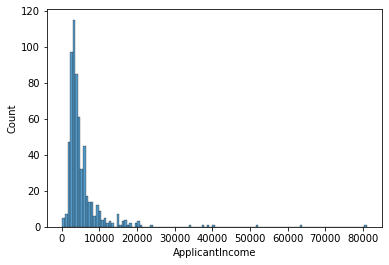

In [22]:
# plt.hist(train["ApplicantIncome"])
sns.histplot(x="ApplicantIncome", data=train)
plt.show()

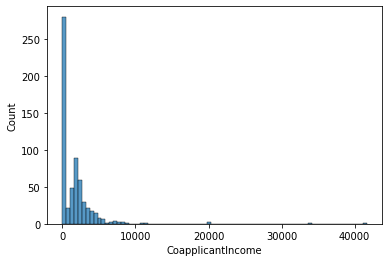

In [23]:
sns.histplot(x="CoapplicantIncome", data=train)
plt.show()

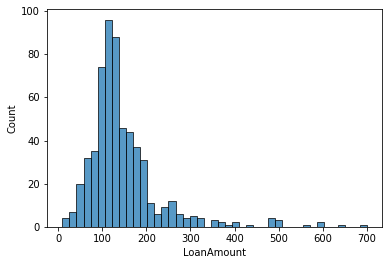

In [24]:
sns.histplot(x="LoanAmount", data=train)
plt.show()

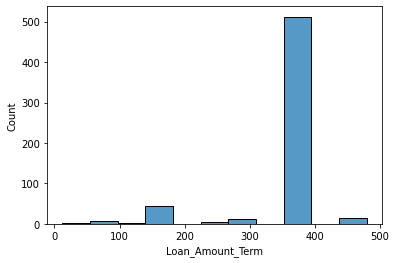

In [25]:
sns.histplot(x="Loan_Amount_Term", data=train)
plt.show()

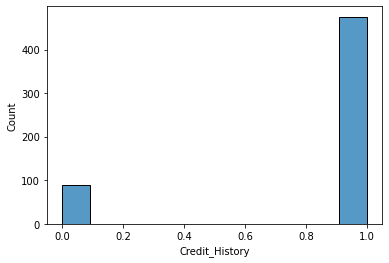

In [26]:
sns.histplot(x="Credit_History", data=train)
plt.show()

In [27]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:title={'center':'Gender'}>

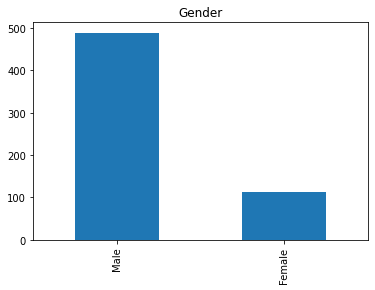

In [34]:
plt.title("Gender")
train["Gender"].value_counts().plot.bar()

In [37]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:title={'center':'Married'}>

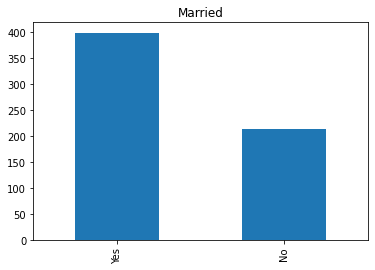

In [39]:
plt.title("Married")
train["Married"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Dependents'}>

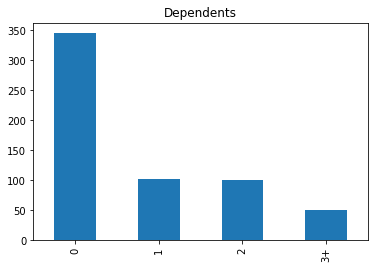

In [40]:
plt.title("Dependents")
train["Dependents"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Education'}>

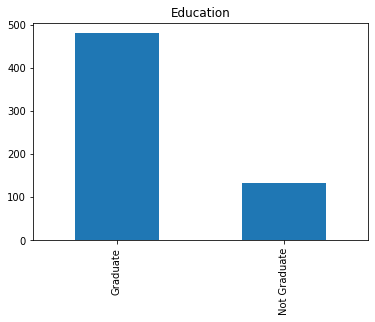

In [41]:
plt.title("Education")
train["Education"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Self_Employed'}>

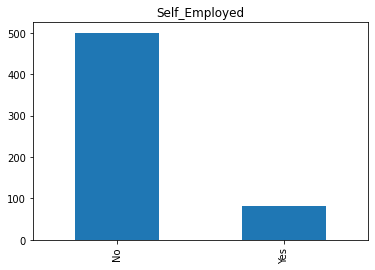

In [42]:
plt.title("Self_Employed")
train["Self_Employed"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Property_Area'}>

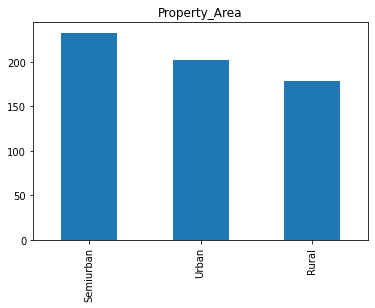

In [44]:
plt.title("Property_Area")
train["Property_Area"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Loan_Status'}>

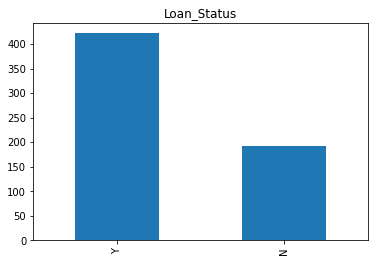

In [46]:
plt.title("Loan_Status")
train["Loan_Status"].value_counts().plot.bar()

In [54]:
ntrain = train.shape[0]
ntest = test.shape[0]
y = train.Loan_Status.values
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(["Loan_Status"], axis=1, inplace=True)
print(f"all_data size is :{all_data.size}")


all_data size is :11772


In [64]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({ "Missing Ratio" : all_data_na })
missing_data

,Missing Ratio
Credit_History,8.053007
Self_Employed,5.606524
LoanAmount,2.752294
Dependents,2.548420
Gender,2.446483
Loan_Amount_Term,2.038736
Married,0.305810


In [66]:
all_data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [67]:
all_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [68]:
all_data.LoanAmount.describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [69]:
Numeric_Columns = all_data.select_dtypes(include=np.number)
Numeric_Columns.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [72]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_num = pd.DataFrame(my_imputer.fit_transform(Numeric_Columns))

imputed_num.columns = Numeric_Columns.columns

identification = all_data["Loan_ID"]
imputed_num = imputed_num.join(identification)
imputed_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID
0,5849.0,0.0,142.51153,360.0,1.0,LP001002
1,4583.0,1508.0,128.00000,360.0,1.0,LP001003
2,3000.0,0.0,66.00000,360.0,1.0,LP001005
3,2583.0,2358.0,120.00000,360.0,1.0,LP001006
4,6000.0,0.0,141.00000,360.0,1.0,LP001008


In [76]:
Categorical_Columns = all_data.select_dtypes(exclude=np.number)
Categorical_Columns.drop(["Loan_ID"], axis=1, inplace=True)
Categorical_Columns.head()

/home/vishwa/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [74]:
imputed_cat = pd.get_dummies(data= Categorical_Columns)
imputed_cat.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [78]:
imputed_cat = imputed_cat.join(identification)
imputed_cat.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,LP001002
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,LP001003
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,LP001005
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,LP001006
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,LP001008


In [81]:
merged_data = imputed_num.merge(imputed_cat, on="Loan_ID")
merged_data.drop(["Loan_ID"], axis=1, inplace=True)
merged_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,142.51153,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.00000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.00000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.00000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.00000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [83]:
all_data_na = (merged_data.isna().sum() / len(merged_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({ "Missing Ratio" : all_data_na })
missing_data.head()

,Missing Ratio


In [87]:
X_tra = merged_data[:ntrain]
X_test = merged_data[ntrain:]
print(X_tra.shape)
X_tra.info()


(614, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    uint8  
 6   Gender_Male              614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Gr

In [103]:
log_train = train
log_test = test
print(log_train.shape) 
print(log_test.shape)
print(log_test.head())
log_train.head()


(341, 13)
(365, 12)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [105]:
log_train.drop(log_train.loc[log_train["ApplicantIncome"] == 0].index, inplace=True)
log_train.drop(log_train.loc[log_train["CoapplicantIncome"] == 0].index, inplace=True)
log_train.drop(log_train.loc[log_train["LoanAmount"] == 0].index, inplace=True)

log_test.drop(log_test.loc[log_test["ApplicantIncome"] == 0].index,inplace=True)
log_test.drop(log_test.loc[log_test["CoapplicantIncome"] == 0].index,inplace=True)
log_test.drop(log_test.loc[log_test["LoanAmount"] == 0].index,inplace=True)
log_test.shape

(209, 12)

In [192]:
nlog_train = log_train.shape[0]
nlog_test = log_test.shape[0]
Y_log = log_train.Loan_Status.values
print(Y_log.shape)
all_data_log = pd.concat([log_train, log_test]).reset_index(drop=True)
all_data_log.drop(["Loan_Status"], axis=1, inplace=True)
print(f"all_data_log size is:{all_data_log.shape}")

(341,)
all_data_log size is:(550, 12)


In [142]:
all_data_log["ApplicantIncomes_log"] = np.log(all_data_log["ApplicantIncome"])
all_data_log["CoapplicantIncome_log"] = np.log(all_data_log["CoapplicantIncome"])
all_data_log["LoanAmount_log"] = np.log(all_data_log["LoanAmount"])
all_data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                550 non-null    object 
 1   Gender                 536 non-null    object 
 2   Married                549 non-null    object 
 3   Dependents             538 non-null    object 
 4   Education              550 non-null    object 
 5   Self_Employed          517 non-null    object 
 6   ApplicantIncome        550 non-null    int64  
 7   CoapplicantIncome      550 non-null    float64
 8   LoanAmount             538 non-null    float64
 9   Loan_Amount_Term       535 non-null    float64
 10  Credit_History         499 non-null    float64
 11  Property_Area          550 non-null    object 
 12  ApplicantIncomes_log   550 non-null    float64
 13  CoapplicantIncome_log  550 non-null    float64
 14  LoanAmount_log         538 non-null    float64
dtypes: flo

/home/vishwa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomes_log', ylabel='Density'>

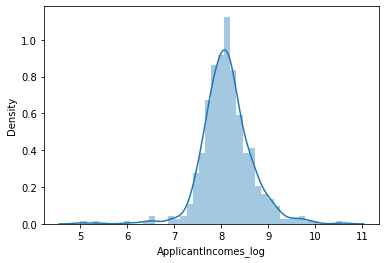

In [148]:
# plt.hist(all_data_log["ApplicantIncomes_log"])
sns.distplot(all_data_log["ApplicantIncomes_log"])

/home/vishwa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome_log', ylabel='Density'>

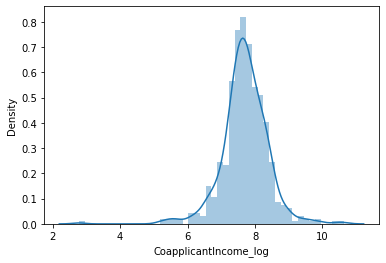

In [149]:
sns.distplot(all_data_log["CoapplicantIncome_log"])

/home/vishwa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

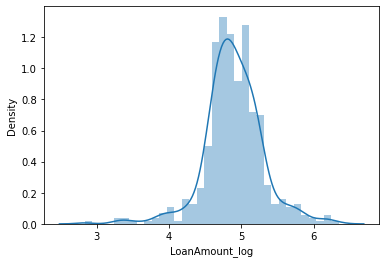

In [151]:
sns.distplot(all_data_log["LoanAmount_log"])

<AxesSubplot:xlabel='ApplicantIncome'>

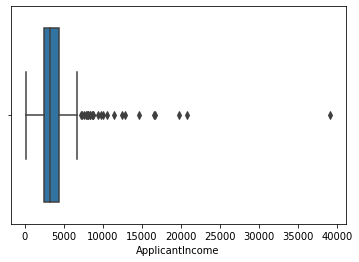

In [152]:
sns.boxplot(x="ApplicantIncome", data=train)

In [160]:

all_data_log.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                550 non-null    object 
 1   Gender                 536 non-null    object 
 2   Married                549 non-null    object 
 3   Dependents             538 non-null    object 
 4   Education              550 non-null    object 
 5   Self_Employed          517 non-null    object 
 6   CoapplicantIncome      550 non-null    float64
 7   LoanAmount             538 non-null    float64
 8   Loan_Amount_Term       535 non-null    float64
 9   Credit_History         499 non-null    float64
 10  Property_Area          550 non-null    object 
 11  ApplicantIncomes_log   550 non-null    float64
 12  CoapplicantIncome_log  550 non-null    float64
 13  LoanAmount_log         538 non-null    float64
dtypes: float64(7), object(7)
memory usage: 60.3+ KB


In [164]:
# all_data_log.drop("ApplicantIncome", axis=1, inplace=True)
all_data_log.drop("CoapplicantIncome", axis=1, inplace=True)
all_data_log.drop("LoanAmount", axis=1, inplace=True)

In [163]:
all_data_log.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomes_log,CoapplicantIncome_log,LoanAmount_log
0,LP001003,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,8.430109,7.318540,4.852030
1,LP001006,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,7.856707,7.765569,4.787492
2,LP001011,Male,Yes,2,Graduate,Yes,4196.0,267.0,360.0,1.0,Urban,8.597297,8.341887,5.587249
3,LP001013,Male,Yes,0,Not Graduate,No,1516.0,95.0,360.0,1.0,Urban,7.754910,7.323831,4.553877
4,LP001014,Male,Yes,3+,Graduate,No,2504.0,158.0,360.0,0.0,Semiurban,8.018296,7.825645,5.062595


In [198]:
Numeric_Columns_log = all_data_log.select_dtypes(include=np.number)
print(Numeric_Columns_log.shape)
print(all_data_log.shape)
Numeric_Columns_log.head()

(550, 5)
(550, 12)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,2583,2358.0,120.0,360.0,1.0
2,5417,4196.0,267.0,360.0,1.0
3,2333,1516.0,95.0,360.0,1.0
4,3036,2504.0,158.0,360.0,0.0


In [196]:
imputed_num_log = pd.DataFrame(my_imputer.fit_transform(Numeric_Columns_log))

imputed_num_log.columns = Numeric_Columns_log.columns

identification_log = all_data_log["Loan_ID"]

imputed_num_log = imputed_num_log.join(identification_log)
print(imputed_num_log.shape)
imputed_num_log.head()

(550, 6)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID
0,4583.0,1508.0,128.0,360.0,1.0,LP001003
1,2583.0,2358.0,120.0,360.0,1.0,LP001006
2,5417.0,4196.0,267.0,360.0,1.0,LP001011
3,2333.0,1516.0,95.0,360.0,1.0,LP001013
4,3036.0,2504.0,158.0,360.0,0.0,LP001014


In [169]:
Categorical_Columns_log = all_data_log.select_dtypes(exclude=np.number)

Categorical_Columns_log.drop("Loan_ID", axis=1, inplace=True)
Categorical_Columns_log.head()

/home/vishwa/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,1,Graduate,No,Rural
1,Male,Yes,0,Not Graduate,No,Urban
2,Male,Yes,2,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,Yes,3+,Graduate,No,Semiurban


In [197]:
imputed_cat_log = pd.get_dummies(data=Categorical_Columns_log)
print(imputed_cat_log.shape)
imputed_cat_log.head()

(550, 15)


,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0


In [199]:
imputed_cat_log = imputed_cat_log.join(identification_log)
imputed_cat_log.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,LP001003
1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,LP001006
2,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,LP001011
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,LP001013
4,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,LP001014


In [200]:
merge_data_log = imputed_num_log.merge(imputed_cat_log,on="Loan_ID")
merge_data_log.drop(["Loan_ID"], axis=1, inplace=True)
print(merge_data_log.shape)
merge_data_log.head()



(550, 20)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
2,5417.0,4196.0,267.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
3,2333.0,1516.0,95.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,3036.0,2504.0,158.0,360.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0


In [201]:
all_data_log_na= (merge_data_log.isnull().sum()/ len(merge_data_log
))*100
all_data_log_na = all_data_log_na.drop(all_data_log_na[all_data_log_na==0].index).sort_values(ascending = False)[:30]
missing_data_log = pd.DataFrame({ "Missing Ratio " : all_data_log_na })
missing_data_log.head(10)

,Missing Ratio


In [206]:
X_tra_log = merge_data_log[:nlog_train]
X_test_log = merge_data_log[nlog_train:]
print(X_tra_log.shape, X_test_log.shape)
print(nlog_train, nlog_test, Y_log.shape)
X_tra_log.info()

(341, 20) (209, 20)
341 209 (341,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 340
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          341 non-null    float64
 1   CoapplicantIncome        341 non-null    float64
 2   LoanAmount               341 non-null    float64
 3   Loan_Amount_Term         341 non-null    float64
 4   Credit_History           341 non-null    float64
 5   Gender_Female            341 non-null    uint8  
 6   Gender_Male              341 non-null    uint8  
 7   Married_No               341 non-null    uint8  
 8   Married_Yes              341 non-null    uint8  
 9   Dependents_0             341 non-null    uint8  
 10  Dependents_1             341 non-null    uint8  
 11  Dependents_2             341 non-null    uint8  
 12  Dependents_3+            341 non-null    uint8  
 13  Education_Graduate       341 non-null    uint

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [209]:
x_train, x_cv, y_train, y_cv = train_test_split(X_tra_log, Y_log, test_size=0.3)


In [210]:
log_mod = LogisticRegression()
log_mod.fit(x_train, y_train)


LogisticRegression()

In [212]:
y_predict = log_mod.predict(x_cv)


In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_cv)

0.8349514563106796

In [216]:
log_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [219]:
T_test = log_mod.predict(X_test_log )
T_test 

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y